<a href="https://colab.research.google.com/github/guilherminog/Desafios-DNC/blob/main/aula_guilhermino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - Wallmart

Case: Você foi contratado pelo Wallmart para fazer um levantamento do faturamento das lojas nos USA e apontar qual loja seria melhor para expandir seu tamanho. É preciso analisar as vendas semanais de cada loja, calcular algumas informações importantes que serão perguntadas e ao final de tudo, indicar em qual loja deva ser investida.

# Sobre o Wallmart
[Walmart, Inc.](https://pt.wikipedia.org/wiki/Walmart), é uma multinacional estadunidense de lojas de departamento. A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. No ano de 2021, obteve um um lucro de $13.51 Bilhões.

# O Dataset

Sendo uma das principais lojas de varejo do mundo, os dados contemplam as vendas semanais de 45 lojas espalhadas pelos Estados Unidos. O Walmart realiza vários eventos promocionais de descontos ao longo do ano. Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. As semanas que incluem esses feriados têm um peso maior.

Sobre o [Dataset do Wallmart](https://www.kaggle.com/yasserh/walmart-dataset)

Os dados apresentam as vendas semanais de 05/02/10 até 01/11/12 em 45 lojas varejistas da rede Wallmart e também algumas métricas econômicas e meteriológicas por semana. A descrição destas características estão abaixo:

Variável | Descrição
--- | ---
Store | Número da Loja
Date | Semana de venda
Weekly_Sales | Venda naquela semana
Holiday_Flag | Flag se é ou não semana com feriado (1 – Holiday week 0 – Non-holiday week)
Temperature | Temperatuda do dia em ºF
Fuel_Price | Preço do combustível na região da loja
CPI | Índice de preços ao consumidor
Unemployment | Taxa de desemprego

Variável | Descrição
--- | ---
Holiday Events | Semanas
Super Bowl |  12-Feb-10, 11-Feb-11, 10-Feb-12
Labour Day | 10-Sep-10, 9-Sep-11, 7-Sep-12
Thanksgiving |  26-Nov-10, 25-Nov-11, 23-Nov-12
Christmas |  31-Dec-10, 30-Dec-11, 28-Dec-12

# Perguntas importantes a serem respondidas

1. Qual o preço médio de venda semanal por loja?
2. Qual o atributo que tem maior correlação (positiva ou negatica) com o número de vendas? (E que faça sentido)
3. Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?
4. Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.
5. Pensando na expansão de uma das lojas, que loja você escolheria e o por que?  

# Importação de bibliotecas


In [1]:
# Importanção de bibliotecas
import numpy as np
from datetime import date,datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataViz
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Sklearn
from sklearn import model_selection, metrics

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Walmart.csv')
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')

In [3]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.tail(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
df.sample(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3380,24,2011-11-04,1385860.38,0,39.87,3.738,136.475129,8.454
2303,17,2010-05-21,826626.50,0,53.94,2.950,126.184387,6.635
2689,19,2012-04-20,1255087.26,0,55.20,4.170,137.923067,8.150
3432,25,2010-02-05,677231.63,0,21.10,2.784,204.247194,8.187
5938,42,2011-07-15,591703.82,0,86.01,3.779,129.133839,8.257
2925,21,2011-05-06,718898.33,0,61.87,3.906,215.444871,7.931
5787,41,2011-05-20,1244542.33,0,41.11,3.828,192.831317,6.934
1198,9,2011-02-18,610985.56,0,58.50,3.045,216.815486,6.416
2337,17,2011-01-14,758510.36,0,16.57,2.903,127.300935,6.866
934,7,2011-07-22,688043.96,0,56.22,3.545,193.512037,8.622


In [6]:
print(f'Quantidade de linhas no dataset: {df.shape[0]}')
print(f'Quantidade de colunas do dataset: {df.shape[1]}')

Quantidade de linhas no dataset: 6435
Quantidade de colunas do dataset: 8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [45]:
df_numeric = df.select_dtypes(include=['float64','int64'])
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [43]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Holiday_Flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
CPI,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


In [8]:
df.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,1.577299e-13,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Date,1.577299e-13,1.000000e+00,0.006949,-1.328524e-02,0.145357,0.771444,0.077157,-0.248203
Weekly_Sales,-3.353320e-01,6.949360e-03,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,-1.328524e-02,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,1.453566e-01,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,7.714439e-01,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,7.715746e-02,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-2.482029e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [9]:
abs(df.corr()['Weekly_Sales']).sort_values(ascending=False)

,Weekly_Sales
Weekly_Sales,1.000000
Store,0.335332
Unemployment,0.106176
CPI,0.072634
Temperature,0.063810
Holiday_Flag,0.036891
Fuel_Price,0.009464
Date,0.006949


In [10]:
abs(df.corr()['Fuel_Price']).sort_values(ascending=False)

,Fuel_Price
Fuel_Price,1.000000
Date,0.771444
CPI,0.170642
Temperature,0.144982
Holiday_Flag,0.078347
Store,0.060023
Unemployment,0.034684
Weekly_Sales,0.009464


<Axes: >

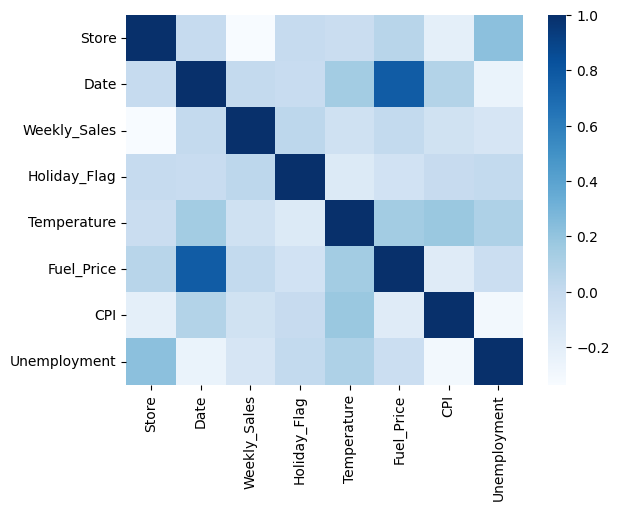

In [11]:
sns.heatmap(df.corr(), cmap='Blues')

In [12]:
df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [13]:
df_group = df.groupby('Store',as_index=False).mean()
df_group.sort_values('Weekly_Sales',ascending=False)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
19,20,2011-06-17,2.107677e+06,0.06993,55.451399,3.417608,209.038131,7.371413
3,4,2011-06-17,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692
13,14,2011-06-17,2.020978e+06,0.06993,57.790979,3.417608,186.285678,8.648748
12,13,2011-06-17,2.003620e+06,0.06993,53.697133,3.286147,128.679669,7.001825
1,2,2011-06-17,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846
9,10,2011-06-17,1.899425e+06,0.06993,72.241189,3.575923,128.679669,8.362965
26,27,2011-06-17,1.775216e+06,0.06993,57.311119,3.578294,139.011284,8.001748
5,6,2011-06-17,1.564728e+06,0.06993,69.700000,3.219699,217.553197,6.606902
0,1,2011-06-17,1.555264e+06,0.06993,68.306783,3.219699,215.996892,7.610420
38,39,2011-06-17,1.450668e+06,0.06993,70.597343,3.219699,214.729069,7.869049


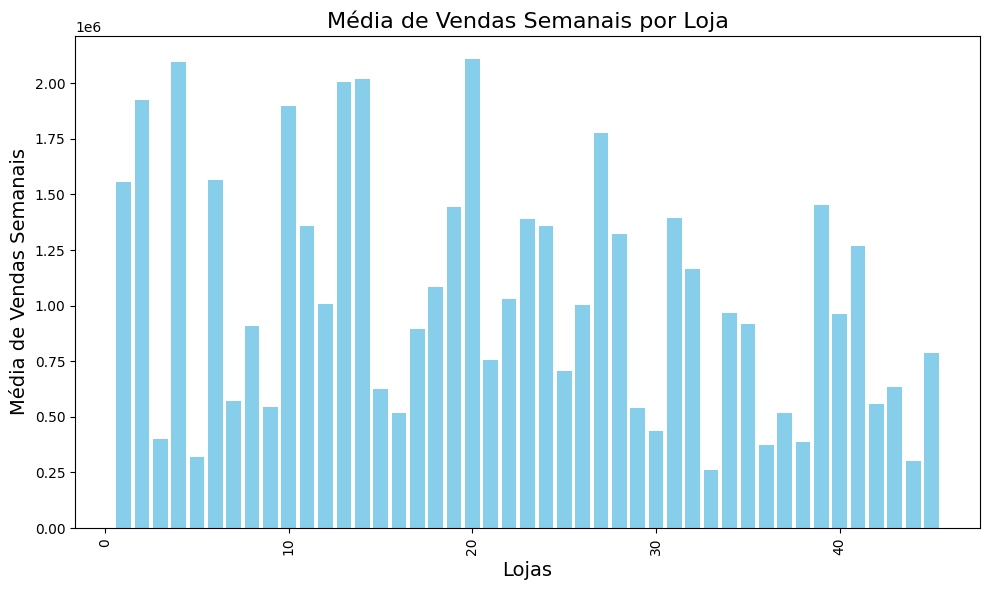

In [14]:
df_group = df.groupby('Store', as_index=False).mean()

df_group = df_group.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(df_group['Store'], df_group['Weekly_Sales'], color='skyblue')

plt.title('Média de Vendas Semanais por Loja', fontsize=16)
plt.xlabel('Lojas', fontsize=14)
plt.ylabel('Média de Vendas Semanais', fontsize=14)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [16]:
df_group = df.groupby('Store',as_index=False).mean()
df_group.sort_values('Weekly_Sales',ascending=False)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
19,20,2011-06-17,2.107677e+06,0.06993,55.451399,3.417608,209.038131,7.371413
3,4,2011-06-17,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692
13,14,2011-06-17,2.020978e+06,0.06993,57.790979,3.417608,186.285678,8.648748
12,13,2011-06-17,2.003620e+06,0.06993,53.697133,3.286147,128.679669,7.001825
1,2,2011-06-17,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846
9,10,2011-06-17,1.899425e+06,0.06993,72.241189,3.575923,128.679669,8.362965
26,27,2011-06-17,1.775216e+06,0.06993,57.311119,3.578294,139.011284,8.001748
5,6,2011-06-17,1.564728e+06,0.06993,69.700000,3.219699,217.553197,6.606902
0,1,2011-06-17,1.555264e+06,0.06993,68.306783,3.219699,215.996892,7.610420
38,39,2011-06-17,1.450668e+06,0.06993,70.597343,3.219699,214.729069,7.869049


In [65]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [21]:
df_agg = df.groupby(['Date', 'Temperature', 'Fuel_Price', 'CPI','Unemployment']).agg({'Store': 'nunique'}).sort_values(['Store','Date'] ,ascending=False)
df_agg[df_agg.Store == 3]

Store
Date       Temperature Fuel_Price CPI        Unemployment       
2012-10-26 65.95       4.301      131.193097 10.199            3
           70.50       3.506      223.078337 6.170             3
2012-10-19 68.52       3.594      223.059808 6.170             3
           68.66       4.449      131.149968 10.199            3
2012-10-12 61.53       3.601      223.015426 6.170             3
...                                                          ...
2010-02-19 54.83       2.915      126.526286 13.975            3
2010-02-12 37.77       2.548      210.897994 8.324             3
           47.87       2.946      126.496258 13.975            3
2010-02-05 39.05       2.572      210.752605 8.324             3
           49.47       2.962      126.442065 13.975            3

[286 rows x 1 columns]

In [22]:
df_agg.head()

Store
Date       Temperature Fuel_Price CPI        Unemployment       
2012-10-26 65.95       4.301      131.193097 10.199            3
           70.50       3.506      223.078337 6.170             3
2012-10-19 68.52       3.594      223.059808 6.170             3
           68.66       4.449      131.149968 10.199            3
2012-10-12 61.53       3.601      223.015426 6.170             3

In [23]:
df[['Temperature','Fuel_Price']].median()

,0
Temperature,62.670
Fuel_Price,3.445


In [86]:
df[ (df.Temperature == 68.52) & (df.Fuel_Price == 3.594)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3001,21,2012-10-19,641368.14,0,68.52,3.594,223.059808,6.17
4288,30,2012-10-19,437537.29,0,68.52,3.594,223.059808,6.17
4431,31,2012-10-19,1378730.45,0,68.52,3.594,223.059808,6.17


In [35]:
df_store = df[df.Store == 20]
df_store

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,2010-02-05,2401395.47,0,25.92,2.784,204.247194,8.187
2718,20,2010-02-12,2109107.90,1,22.12,2.773,204.385747,8.187
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187
2720,20,2010-02-26,1898193.95,0,32.32,2.754,204.463087,8.187
2721,20,2010-03-05,2119213.72,0,31.75,2.777,204.494073,8.187
...,...,...,...,...,...,...,...,...
2855,20,2012-09-28,2008350.58,0,58.65,3.997,215.736716,7.280
2856,20,2012-10-05,2246411.89,0,60.77,3.985,215.925886,7.293
2857,20,2012-10-12,2162951.36,0,47.20,4.000,216.115057,7.293
2858,20,2012-10-19,1999363.49,0,56.26,3.969,216.146470,7.293


<Axes: xlabel='Date', ylabel='Weekly_Sales'>

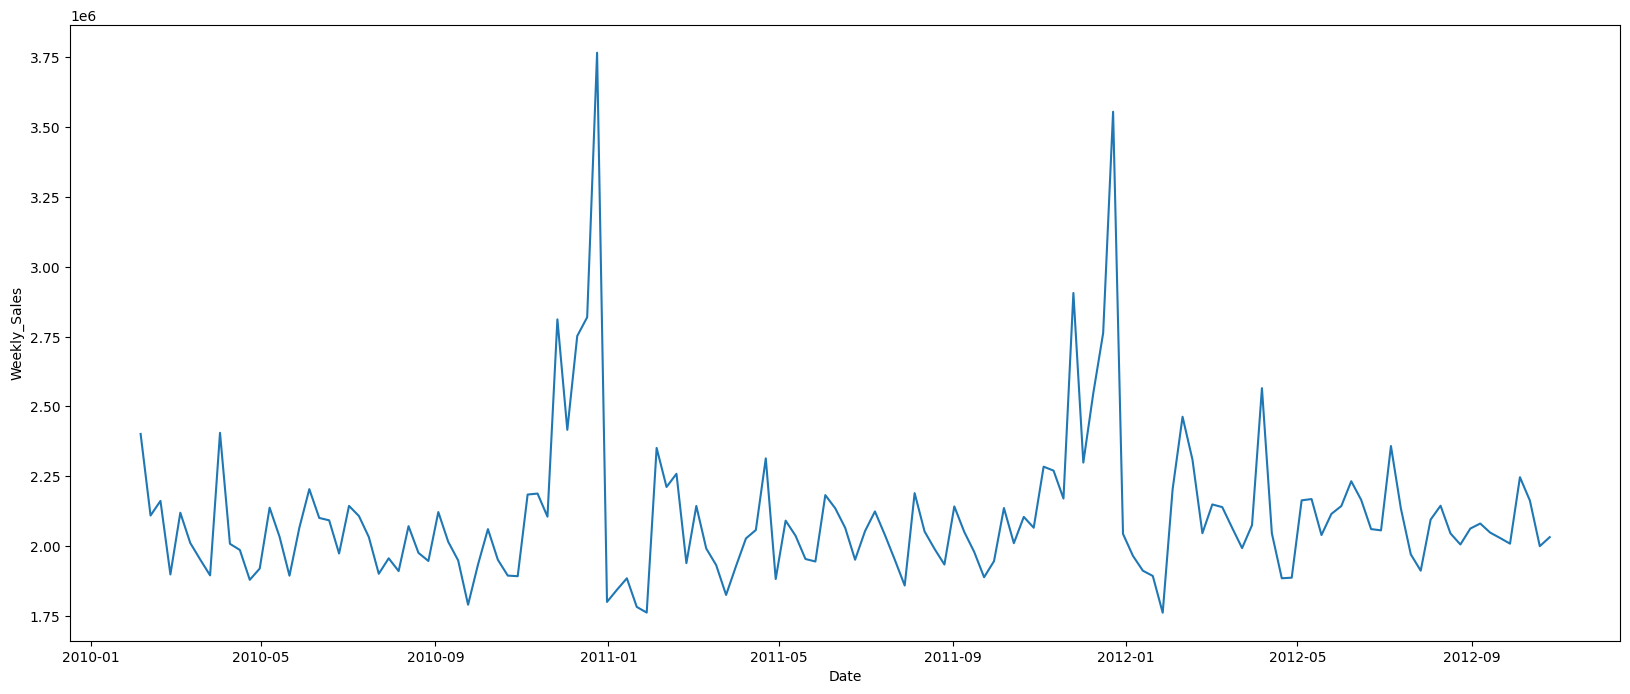

In [36]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_store,x='Date',y='Weekly_Sales')

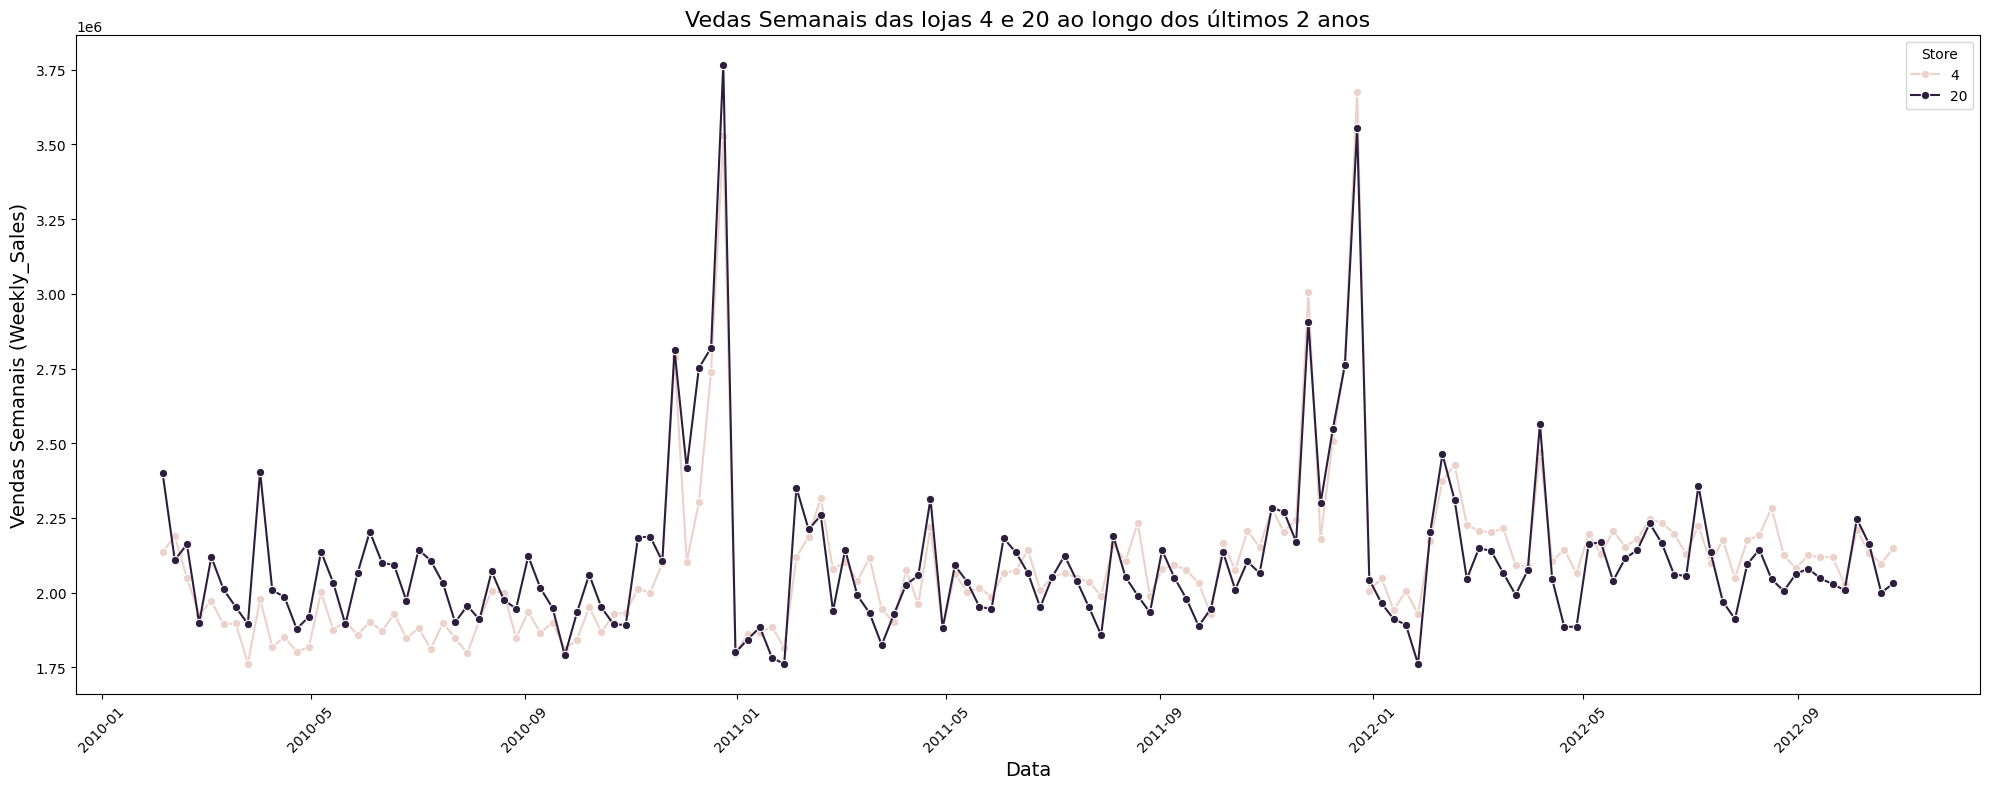

In [39]:
df_store = df[df['Store'].isin([4,20])]

plt.figure(figsize=(20,8))
sns.lineplot(data=df_store,x='Date',y='Weekly_Sales',hue='Store', marker='o')

plt.title('Vedas Semanais das lojas 4 e 20 ao longo dos últimos 2 anos', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Vendas Semanais (Weekly_Sales)', fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

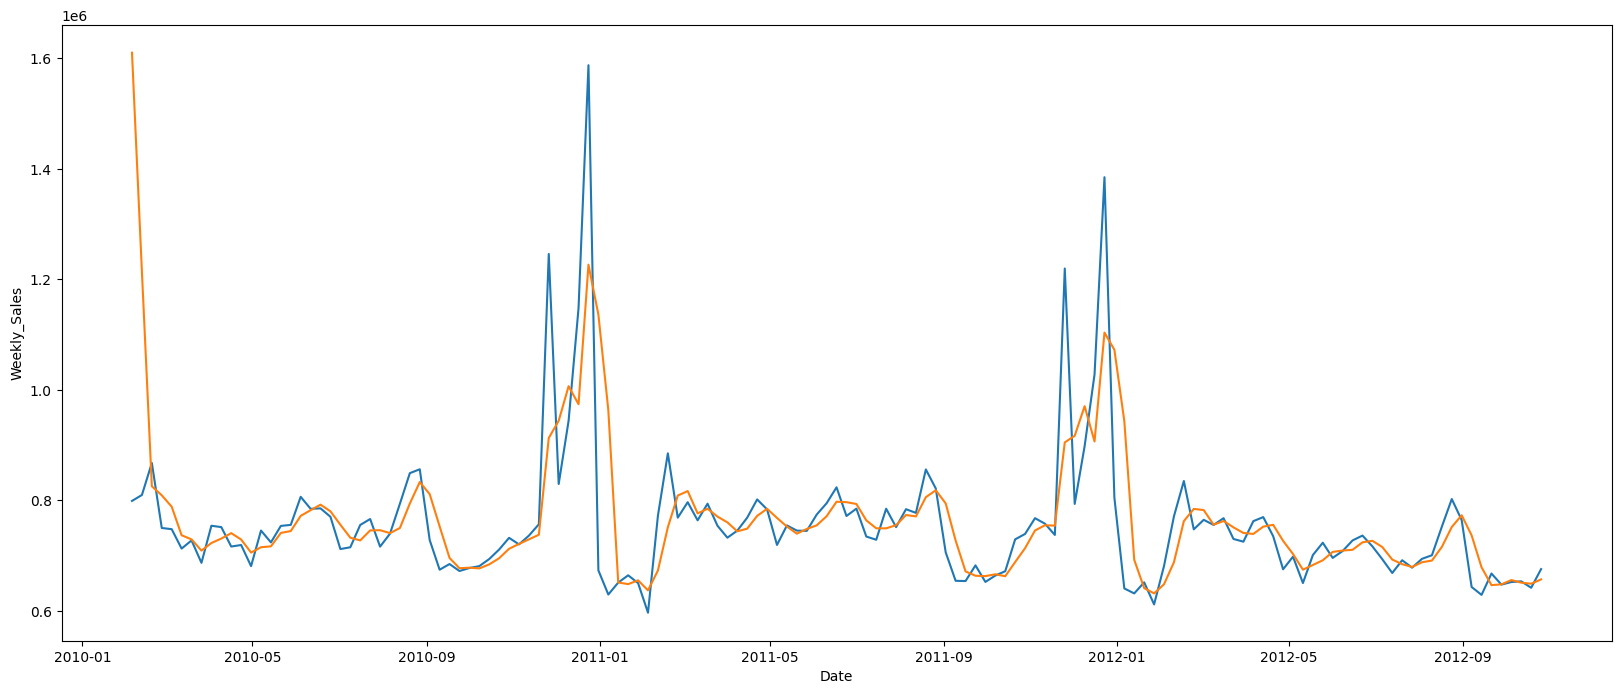

In [40]:
df1['Moving_avg'] = df['Weekly_Sales'].rolling(window=3).mean()

plt.figure(figsize=(20,8))
sns.lineplot(data=df1,x='Date',y='Weekly_Sales')
sns.lineplot(data=df1,x='Date',y='Moving_avg')

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

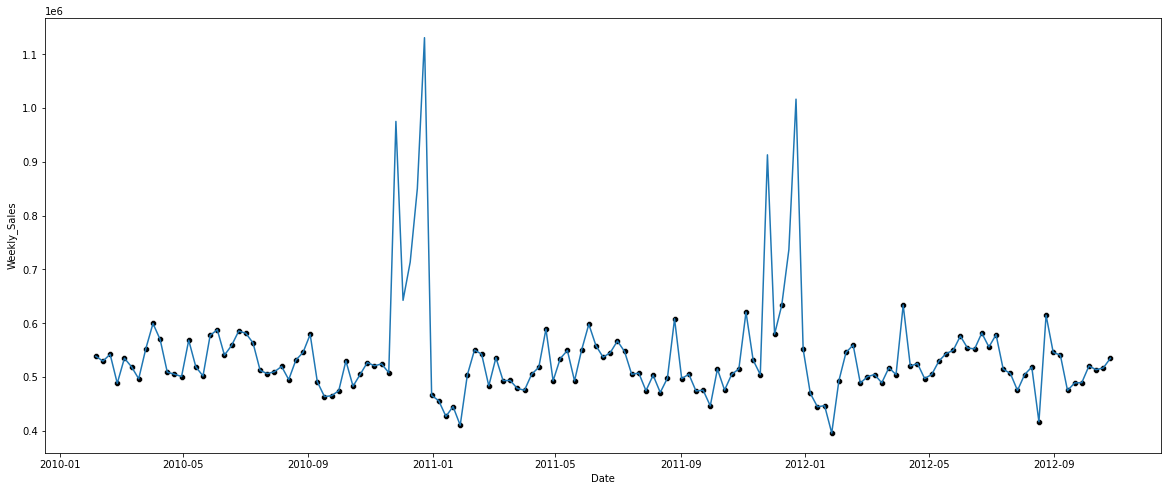

In [ ]:
lim_cut = df1.describe(percentiles=[0.8,0.9,0.95,0.99])['Weekly_Sales']['95%']
df1_clean = df1[df1.Weekly_Sales <= lim_cut]

plt.figure(figsize=(20,8))
sns.lineplot(data=df1,x='Date',y='Weekly_Sales')
sns.scatterplot(data=df1_clean,x='Date',y='Weekly_Sales',color='k')

<ipython-input-56-4a93b44c7b71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sales_N'] = df1['Weekly_Sales']/df1['Weekly_Sales'].max()


<Axes: xlabel='Date', ylabel='Sales_N'>

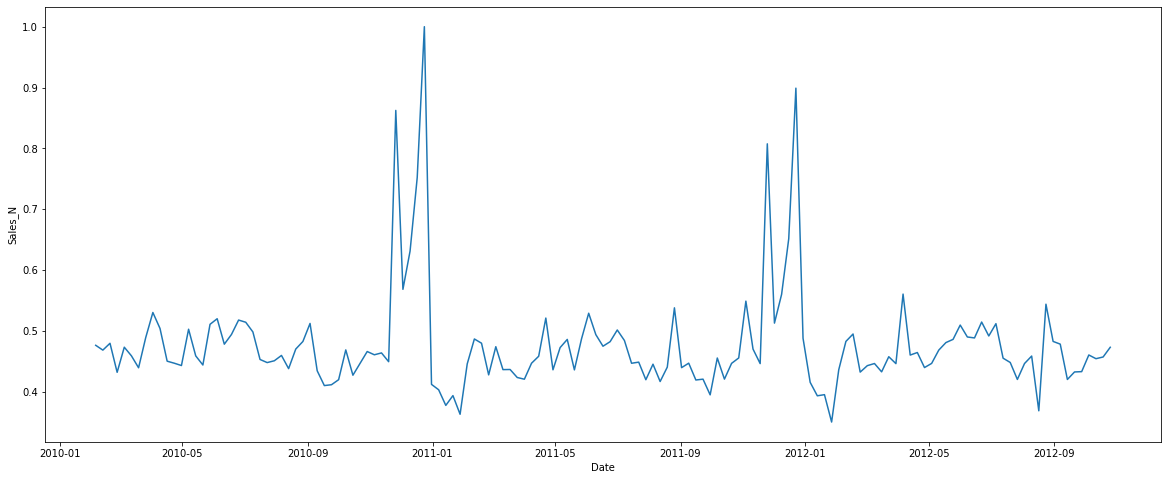

In [ ]:
df1['Sales_N'] = df1['Weekly_Sales']/df1['Weekly_Sales'].max()
plt.figure(figsize=(20,8))
sns.lineplot(data=df1,x='Date',y='Sales_N')

<ipython-input-62-c85bfaceb912>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Acum_sales'] = df1['Weekly_Sales'].cumsum()
<ipython-input-62-c85bfaceb912>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Acum_sales_perc'] = df1['Acum_sales']/df1['Weekly_Sales'].sum()


<Axes: xlabel='Date', ylabel='Sales_N'>

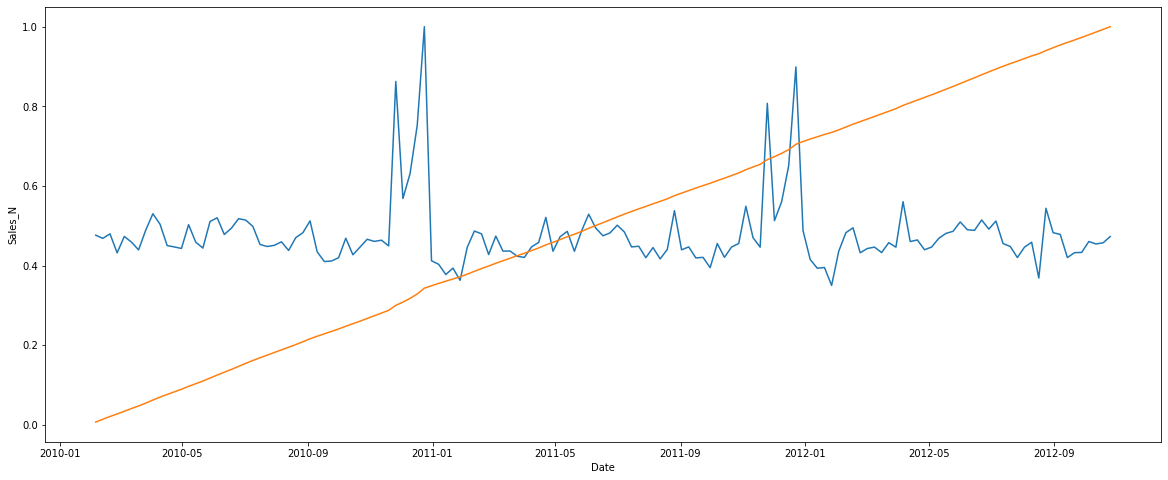

In [ ]:
df1['Acum_sales'] = df1['Weekly_Sales'].cumsum()
df1['Acum_sales_perc'] = df1['Acum_sales']/df1['Weekly_Sales'].sum()
plt.figure(figsize=(20,8))
sns.lineplot(data=df1,x='Date',y='Sales_N')
sns.lineplot(data=df1,x='Date',y='Acum_sales_perc')

In [ ]:
df1['Weekly_Sales'].describe()

count    1.430000e+02
mean     5.394514e+05
std      9.912014e+04
min      3.959872e+05
25%      4.944612e+05
50%      5.186284e+05
75%      5.520409e+05
max      1.130927e+06
Name: Weekly_Sales, dtype: float64

In [ ]:
df1_clean['Weekly_Sales'].describe()

count       135.000000
mean     519716.287778
std       43930.500143
min      395987.240000
25%      493294.900000
50%      515119.640000
75%      546715.490000
max      633826.550000
Name: Weekly_Sales, dtype: float64

In [ ]:
df1['Dif_relative'] = (df1['Weekly_Sales'].shift(1) - df1['Weekly_Sales'])/df1['Weekly_Sales'].shift(1)*-100
df1

<ipython-input-17-b0488c1ab21d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Dif_relative'] = (df1['Weekly_Sales'].shift(1) - df1['Weekly_Sales'])/df1['Weekly_Sales'].shift(1)*-100


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Moving_avg,Dif_relative
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,NaN
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,NaN,-0.105461
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,1.632539e+06,-1.826434
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,1.554551e+06,-12.546189
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1.525501e+06,10.291285
...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,1.486871e+06,-4.585725
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,1.537990e+06,16.264236
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,1.560306e+06,-5.848335
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,1.583976e+06,-4.132297


In [ ]:
df1['Year_Month'] = df['Date'].dt.strftime('%Y-%m')
df1.groupby(['Year_Month','Store']).agg({'Weekly_Sales':['mean','max','min','sum'],
                                         'Dif_relative':['mean','max','min','sum','std']})

<ipython-input-25-debcb0c9ec8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year_Month'] = df['Date'].dt.strftime('%Y-%m')


Weekly_Sales                                      \
                          mean         max         min         sum   
Year_Month Store                                                     
2010-02    1      1.576836e+06  1643690.90  1409727.59  6307344.10   
2010-03    1      1.467823e+06  1554806.68  1404429.92  5871293.98   
2010-04    1      1.484560e+06  1594968.28  1391256.12  7422801.92   
2010-05    1      1.482485e+06  1603955.12  1399662.07  5929938.64   
2010-06    1      1.521020e+06  1615524.71  1422711.60  6084081.46   
2010-07    1      1.448897e+06  1546074.18  1371986.60  7244483.04   
2010-08    1      1.518988e+06  1605491.78  1449142.92  6075952.95   
2010-09    1      1.457448e+06  1540163.53  1351791.03  5829793.92   
2010-10    1      1.430128e+06  1508239.93  1345454.00  7150641.75   
2010-11    1      1.621387e+06  1955624.11  1483784.18  6485547.06   
2010-12    1      1.775391e+06  2387950.20  1367320.01  8876953.18   
2011-01    1      1.370013e+06  1444732.28  1316899.31  5480050.97   
2011-02    1      1.599972e+06  1686842.78  1456800.28  6399887.57   
2011-03    1      1.576844e+06  1636263.41  1541102.38  6307375.48   
2011-04    1      1.537825e+06  1614259.35  1455090.69  7689123.60   
2011-05    1      1.532108e+06  1629391.28  1428218.27  6128431.80   
2011-06    1      1.548743e+06  1635078.41  1438830.15  6194971.74   
2011-07    1      1.445531e+06  1534849.64  1352219.79  7227654.31   
2011-08    1      1.536246e+06  1624383.75  1464693.46  6144985.73   
2011-09    1      1.475908e+06  1550229.22  1380020.27  7379542.34   
2011-10    1      1.518082e+06  1630989.95  1445249.09  6072327.75   
2011-11    1      1.716243e+06  2033320.66  1539483.70  6864972.83   
2011-12    1      1.806519e+06  2270188.99  1497462.72  9032594.71   
2012-01    1      1.430923e+06  1550369.92  1319325.59  5723690.52   
2012-02    1      1.699519e+06  1819870.00  1539387.83  6798074.91   
2012-03    1      1.640399e+06  1688420.76  1511068.07  8201997.40   
2012-04    1      1.627804e+06  1899676.88  1468928.37  6511214.82   
2012-05    1      1.611741e+06  1684519.99  1555444.55  6446962.46   
2012-06    1      1.604117e+06  1697230.96  1527845.81  8020582.84   
2012-07    1      1.558487e+06  1769854.16  1439123.71  6233946.67   
2012-08    1      1.579524e+06  1631135.79  1494122.38  7897619.59   
2012-09    1      1.530595e+06  1661767.33  1437059.26  6122381.52   
2012-10    1      1.561397e+06  1670785.97  1493659.74  6245587.29   

                 Dif_relative                                              
                         mean        max        min        sum        std  
Year_Month Store                                                           
2010-02    1        -4.826028  -0.105461 -12.546189 -14.478085   6.741002  
2010-03    1         0.136161  10.291285  -7.413468   0.544643   7.904052  
2010-04    1         0.531106  13.566954  -5.135195   2.655531   7.915557  
2010-05    1         0.423979  12.550300  -6.839569   1.695916   9.110498  
2010-06    1         0.097018  12.810461  -5.359763   0.388072   8.557228  
2010-07    1        -0.628095   4.899555  -6.282704  -3.140476   4.867137  
2010-08    1         1.764335  17.019494  -6.057584   7.057340  10.517688  
2010-09    1        -1.612473   6.280996  -5.494184  -6.449892   5.473932  
2010-10    1         0.624840   7.511403  -7.808304   3.124202   6.092884  
2010-11    1         9.874051  31.799768  -3.685074  39.496204  16.141778  
2010-12    1        -3.245005  26.277424 -42.740849 -16.225025  27.964398  
2011-01    1        -0.855227   5.661606  -4.572818  -3.420909   4.636464  
2011-02    1         3.323936  22.000943 -13.637459  13.295742  14.583997  
2011-03    1         1.624545  12.318993  -5.076920   6.498180   7.624969  
2011-04    1        -1.015813   7.972538  -7.012253  -5.079063   5.655571  
2011-05    1         0.528649  11.978675 -11.001994   2.114595   9.534364  
2011-06    1        -0.239233  11.529765  -6.088624  

# Análise introdutória

In [ ]:
#-- Load do CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/DNC/Walmart.csv',sep=',')
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.tail()

FileNotFoundError: ignored

In [ ]:
df_sorted  = df.sort_values(['Store', 'Date']).reset_index(drop=True)

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#-- Verificar integridade do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


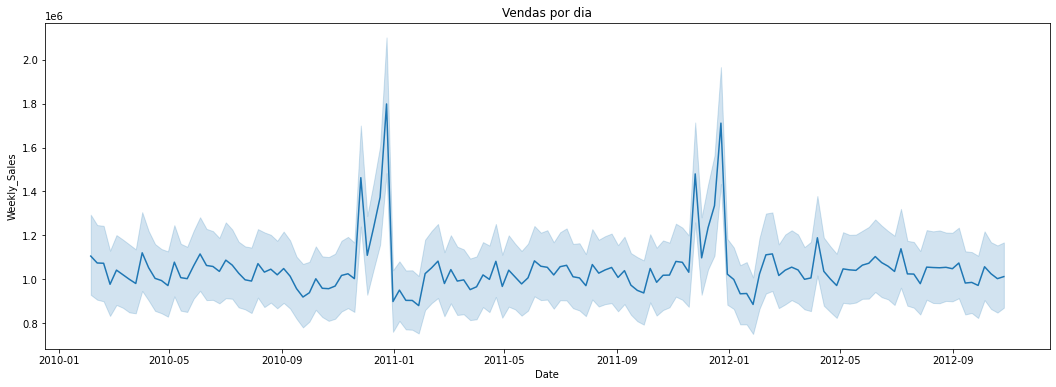

In [ ]:
# Plotando uma relação de Tempo X Venda (Com máximo, mínimo e média entre departamentos e lojas)

plt.figure(figsize=(18,6))
df['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(data=df, x="Date", y="Weekly_Sales")
plt.title('Vendas por dia')
plt.show()



In [ ]:
#-- Análise estatística simplificada
df.describe(percentiles=[0.95,0.99,0.995])

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
95%,43.000000,2.049179e+06,1.000000,87.663000,4.029000,221.926729,12.187000
99%,45.000000,2.404035e+06,1.000000,93.190000,4.203000,225.470151,14.180000
99.5%,45.000000,2.733138e+06,1.000000,95.610000,4.286980,225.961002,14.313000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


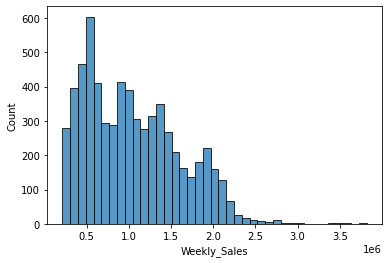

In [ ]:
#-- As vendas semanais estão normalmente entre 0.5 e 1.5 milhõs de dolares
sns.histplot(data=df, x='Weekly_Sales')

# Perguntas importantes

## 1. Qual o preço médio de venda semanal por loja?

In [ ]:
#-- Agrupar por loja
df_group = df.groupby('Store',as_index=False).mean()
df_group.sort_values('Weekly_Sales',ascending=False)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
19,20,2.107677e+06,0.06993,55.451399,3.417608,209.038131,7.371413
3,4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692
13,14,2.020978e+06,0.06993,57.790979,3.417608,186.285678,8.648748
12,13,2.003620e+06,0.06993,53.697133,3.286147,128.679669,7.001825
1,2,1.925751e+06,0.06993,68.216364,3.219699,215.646311,7.623846
9,10,1.899425e+06,0.06993,72.241189,3.575923,128.679669,8.362965
26,27,1.775216e+06,0.06993,57.311119,3.578294,139.011284,8.001748
5,6,1.564728e+06,0.06993,69.700000,3.219699,217.553197,6.606902
0,1,1.555264e+06,0.06993,68.306783,3.219699,215.996892,7.610420
38,39,1.450668e+06,0.06993,70.597343,3.219699,214.729069,7.869049


In [ ]:
#-- Selecionar os 5 com maior Média
top5 = df_group.sort_values('Weekly_Sales',ascending=False).Store.to_list()[:5]
top5

[20, 4, 14, 13, 2]

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


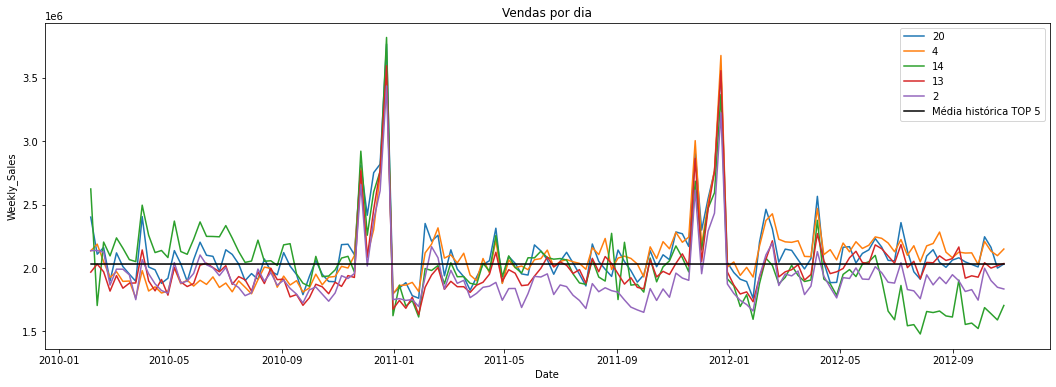

In [ ]:
# Plotando uma relação de Tempo X Venda dos Top 5 acima
plt.figure(figsize=(18,6))
for i in top5:
  sns.lineplot(data=df[df.Store == i], x="Date", y="Weekly_Sales",label=i)


sns.lineplot(data=df, x="Date", y=df[df.Store.isin([20, 4, 14, 13, 2])].Weekly_Sales.mean(),label='Média histórica TOP 5',c='black')


plt.title('Vendas por dia')
plt.show()

## 2. Qual a feature que tem maior correlação (positiva ou negatica) com o número de vendas?

Store          -0.335332
Unemployment   -0.106176
CPI            -0.072634
Temperature    -0.063810
Fuel_Price      0.009464
Holiday_Flag    0.036891
Weekly_Sales    1.000000
Name: Weekly_Sales, dtype: float64


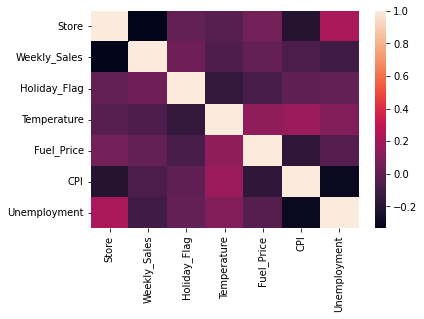

In [ ]:
print(df.corr()['Weekly_Sales'].sort_values())
sns.heatmap(df.corr())
plt.show()

## 3. Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?

In [ ]:
#-- Acumulado
df_acul = df.groupby('Store',as_index=False).sum().sort_values('Weekly_Sales',ascending=False).iloc[0,:]
top_store = df_acul['Store']

# Selecionanto apenas os dados da loja com maior venda (Store 20)
df_top_store = df[df.Store == top_store]
top_mean = df_top_store['Weekly_Sales'].mean()
df_top_store_overmean = df_top_store[df_top_store.Weekly_Sales >= top_mean]
df_top_store_overmean.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,2010-02-05,2401395.47,0,25.92,2.784,204.247194,8.187
2718,20,2010-02-12,2109107.90,1,22.12,2.773,204.385747,8.187
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187
2721,20,2010-03-05,2119213.72,0,31.75,2.777,204.494073,8.187
2725,20,2010-04-02,2405395.22,0,51.00,2.850,204.025284,7.856


In [ ]:
print('Semanas totais:',df_top_store.shape[0])
print('Semanas acima da média:',df_top_store_overmean.shape[0])
print(r'{}% das semanas acima da média'.format(round(df_top_store_overmean.shape[0]*100/df_top_store.shape[0],2)))

Semanas totais: 143
Semanas acima da média: 52
36.36% das semanas acima da média


## 4. Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.

In [ ]:
# Dicionário de feriados
holiday_dict = { #Format: %d/%m/%y
'Super Bowl':	['12/02/10', '11/02/11', '10/02/12'],
'Labour Day':	['10/09/10', '09/09/11', '07/09/12'],
'Thanksgiving':	['26/09/10', '25/09/11', '23/09/12'],
'Christmas':	['31/12/10', '30/12/11', '28/12/12']
}

In [ ]:
# Demonstrativo de como acessar os dados no dict
for i in holiday_dict.keys():
  print(i)
  for k in holiday_dict[i]:
    print(k)

Super Bowl
12/02/10
11/02/11
10/02/12
Labour Day
10/09/10
09/09/11
07/09/12
Thanksgiving
26/09/10
25/09/11
23/09/12
Christmas
31/12/10
30/12/11
28/12/12


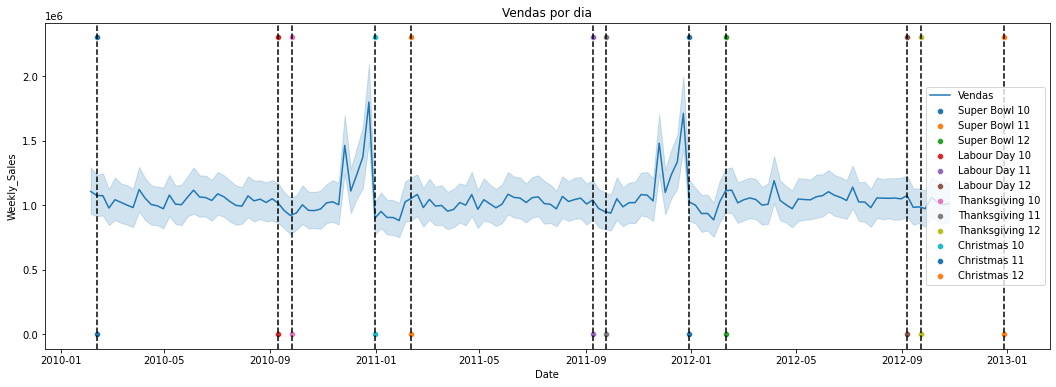

In [ ]:
# Plotando uma relação de Tempo X Venda (Com máximo, mínimo e média)

plt.figure(figsize=(18,6))
sns.lineplot(data=df, x="Date", y="Weekly_Sales", label='Vendas', markers=True, dashes=False)

for i in holiday_dict.keys():
  #print(i)
  for k in holiday_dict[i]:
    #print(k)
    sns.scatterplot(x=[datetime.strptime(k,'%d/%m/%y'),datetime.strptime(k,'%d/%m/%y')],y=[0,2.3*10**6],label=str(i)+ ' ' + k[-2:])
    plt.axvline(datetime.strptime(k,'%d/%m/%y'),0,2.3*10**6,color='black',linestyle='--')


plt.title('Vendas por dia')
plt.show()

## 5. Pensando na expansão de uma das lojas, que loja você escolheria e o por que?  

Como fator de escolha para a pergunta acima, vou escolher a loja que teve um maior rendimento histórico. Ou seja, vou escolher aquela que teve mais semanas com vendas acima da média histórica.

In [ ]:
df_mean = df.groupby('Store',as_index=False).mean()
df_mean = df_mean[['Store','Weekly_Sales']]

In [ ]:
lista_aux = []
lista_aux1 = []
for i in df_mean.Store:
  lista_aux.append(df[df.Store == i].shape[0])
  lista_aux1.append(df[(df.Store == i) & (df.Weekly_Sales >= df_mean.iloc[i-1,1])].shape[0])

In [ ]:
df_mean['Total'] = lista_aux
df_mean['Bateu'] = lista_aux1
df_mean['Perc'] = df_mean['Bateu']/df_mean['Total']*100
display(df_mean)

,Store,Weekly_Sales,Total,Bateu,Perc
0,1,1.555264e+06,143,56,39.160839
1,2,1.925751e+06,143,53,37.062937
2,3,4.027044e+05,143,64,44.755245
3,4,2.094713e+06,143,62,43.356643
4,5,3.180118e+05,143,56,39.160839
5,6,1.564728e+06,143,56,39.160839
6,7,5.706173e+05,143,61,42.657343
7,8,9.087495e+05,143,56,39.160839
8,9,5.439806e+05,143,61,42.657343
9,10,1.899425e+06,143,47,32.867133


In [ ]:
# Loja escolhida foi a loja 43
df_mean.sort_values('Perc',ascending=False).head()

,Store,Weekly_Sales,Total,Bateu,Perc
42,43,633324.723147,143,73,51.048951
41,42,556403.863147,143,71,49.650350
35,36,373511.992797,143,71,49.650350
36,37,518900.281958,143,69,48.251748
37,38,385731.653287,143,68,47.552448
